# Lab Instructions

Find a dataset that interests you. I'd recommend starting on [Kaggle](https://www.kaggle.com/). Read through all of the material about the dataset and download a .CSV file.

1. Write a short summary of the data.  Where did it come from?  How was it collected?  What are the features in the data?  Why is this dataset interesting to you?  

2. Identify 5 interesting questions about your data that you can answer using Pandas methods.  

3. Answer those questions!  You may use any method you want (including LLMs) to help you write your code; however, you should use Pandas to find the answers.  LLMs will not always write code in this way without specific instruction.  

4. Write the answer to your question in a text box underneath the code you used to calculate the answer.



The data set I chose was box office revenue of movies from 2000 to 2024. It was collected by web scraping with Python's BeautifulSoup. The features in the data is the movies year, title, and gross revenues, genres and other misc data. This dataset is interesting to me because I like to look at how much money a movie makes from time to time when im watching a movie.

In [11]:
import pandas as pd
movies_df = pd.read_csv('enhanced_box_office_data(2000-2024)u.csv')
movies_df.head()

,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
0,1,Mission: Impossible II,546388108.0,215409889.0,39.4,330978219.0,60.6,2000,"Adventure, Action, Thriller",6.126/10,6741.0,en,United States of America
1,2,Gladiator,460583960.0,187705427.0,40.8,272878533.0,59.2,2000,"Action, Drama, Adventure",8.217/10,19032.0,en,"United Kingdom, United States of America"
2,3,Cast Away,429632142.0,233632142.0,54.4,196000000.0,45.6,2000,"Adventure, Drama",7.663/10,11403.0,en,United States of America
3,4,What Women Want,374111707.0,182811707.0,48.9,191300000.0,51.1,2000,"Comedy, Romance",6.45/10,3944.0,en,"United Kingdom, United States of America"
4,5,Dinosaur,349822765.0,137748063.0,39.4,212074702.0,60.6,2000,"Animation, Family, Adventure",6.544/10,2530.0,en,United States of America


Question 1.
     What is the gross revenue for movies released in the year 2003.

In [120]:
rev_df = movies_df[movies_df['Year'] == 2003]
rev_df['$Worldwide'].sum()

18743479559.0

Question 1 answer:
The Gross revenue for movies released in the year 2003 was $18,743,479,559

Question 2.
    Whatis the total amount of movies released through out 2000 - 2024 seperated by year?

Year
2000    200
2013    200
2023    200
2022    200
2021    200
2020    200
2019    200
2018    200
2017    200
2016    200
2015    200
2014    200
2012    200
2001    200
2011    200
2010    200
2009    200
2008    200
2007    200
2006    200
2005    200
2004    200
2003    200
2002    200
2024    200
Name: count, dtype: int64

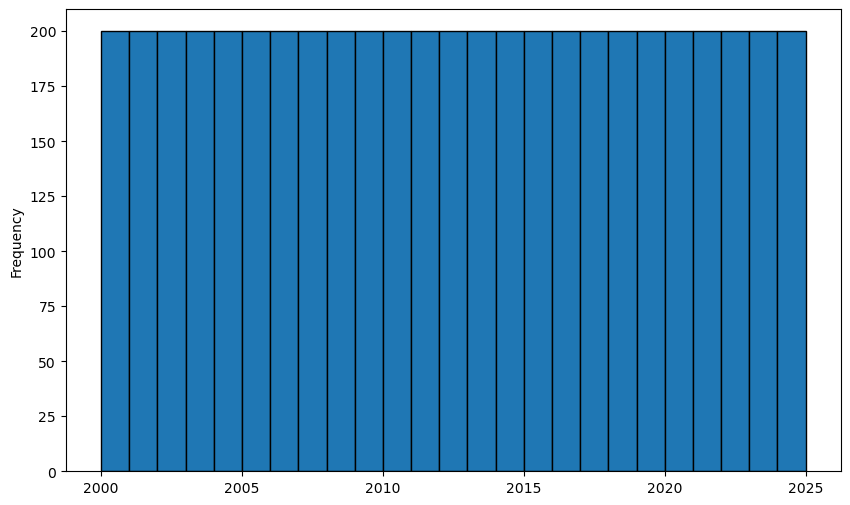

In [79]:
year_df = movies_df['Year']

year_df.plot(kind='hist',bins=range(movies_df['Year'].min(), movies_df['Year'].max() + 2) , edgecolor= 'black',figsize=(10, 6) )
year_df.value_counts()

Question 2 answer:
The amount of movies released in each year according to this dataset is 200.

Question 3.
    what are the total percentages of each genres of movies released from 2000 - 2024.

In [118]:
genre_df = (
    movies_df['Genres']
    .dropna()
    .str.split(',')       
    .explode()           
    .str.strip()          
)

genre_percentages_df = genre_df.value_counts(normalize=True) * 100

genre_percentages_df.head(20)





Genres
Drama              15.595404
Comedy             14.803602
Action             10.743673
Adventure           8.251824
Thriller            8.228536
Romance             6.551778
Crime               5.426176
Family              5.387362
Fantasy             4.921596
Science Fiction     3.990064
Animation           3.865859
Horror              3.384568
Mystery             3.345754
History             2.274492
Music               1.179941
War                 1.117839
Documentary         0.613259
Western             0.263934
TV Movie            0.054339
Name: proportion, dtype: float64

Question 3 answer:
The percentages of each genre are as shown.

Drama              15.595404%
Comedy             14.803602%
Action             10.743673%
Adventure           8.251824%
Thriller            8.228536%
Romance             6.551778%
Crime               5.426176%
Family              5.387362%
Fantasy             4.921596%
Science Fiction     3.990064%
Animation           3.865859%
Horror              3.384568%
Mystery             3.345754%
History             2.274492%
Music               1.179941%
War                 1.117839%
Documentary         0.613259%
Western             0.263934%
TV Movie            0.054339%

Question 4.
    What is the the total percentage of revenue from Avengers Endgame that is from foreign markets?

In [126]:
foreign_percent_df = movies_df.loc[(movies_df['Release Group'] == 'Avengers: Endgame') & (movies_df['Foreign %'])]
foreign_percent_df.head()


,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
3800,1,Avengers: Endgame,2.799439e+09,858373000.0,30.7,1.941066e+09,69.3,2019,"Adventure, Science Fiction, Action",8.246/10,25780.0,en,United States of America


Question 4 answer:
The foreign percent of the worldwide box office for Avengers: Endgame was 69.3 percent.

Question 5.
    What are the top 10 movies with the highest grossing box office domestically?

In [134]:
domestic_df = movies_df.sort_values(by='$Domestic',ascending=False)
domestic_df.head(10)

,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
3000,1,Star Wars: Episode VII - The Force Awakens,2.068224e+09,936662225.0,45.3,1.131561e+09,54.7,2015,"Adventure, Action, Science Fiction",7.271/10,19411.0,en,United States of America
3800,1,Avengers: Endgame,2.799439e+09,858373000.0,30.7,1.941066e+09,69.3,2019,"Adventure, Science Fiction, Action",8.246/10,25780.0,en,United States of America
4200,1,Spider-Man: No Way Home,1.910983e+09,804793477.0,42.1,1.106189e+09,57.9,2021,"Action, Adventure, Science Fiction",8.0/10,20275.0,en,United States of America
1800,1,Avatar,2.743578e+09,749766139.0,27.3,1.993811e+09,72.7,2009,"Action, Adventure, Fantasy, Science Fiction",7.583/10,31654.0,en,"United States of America, United Kingdom"
4401,2,Top Gun: Maverick,1.495696e+09,718732821.0,48.1,7.769635e+08,51.9,2022,"Action, Drama",8.194/10,9343.0,en,United States of America
3601,2,Black Panther,1.346913e+09,700059566.0,52.0,6.468536e+08,48.0,2018,"Action, Adventure, Science Fiction",7.38/10,22231.0,en,United States of America
4400,1,Avatar: The Way of Water,2.320250e+09,684075767.0,29.5,1.636175e+09,70.5,2022,"Science Fiction, Adventure, Action",7.616/10,12052.0,en,United States of America
3600,1,Avengers: Infinity War,2.048360e+09,678815482.0,33.1,1.369544e+09,66.9,2018,"Adventure, Action, Science Fiction",8.242/10,29914.0,en,United States of America
4800,1,Inside Out 2,1.698773e+09,652980194.0,38.4,1.045793e+09,61.6,2024,"Animation, Adventure, Comedy, Family",7.566/10,5141.0,en,United States of America
3001,2,Jurassic World,1.670401e+09,652270625.0,39.0,1.018130e+09,61.0,2015,"Action, Adventure, Science Fiction, Thriller",6.7/10,20370.0,en,United States of America


Question 5 answer:
The top 10 movies with the highest grossing domestic box office are:
1. Star Wars: Episode VII - The Force Awakens
2. Avengers: Endgame
3. Spider-Man: No Way Home
4. Avatar
5. Top Gun: Maverick
6. Black Panther
7. Avatar: The Way of Water
8. Avengers: Infinity War
9. Inside Out 2
10. Jurassic World